In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates
import warnings
from sklearn.model_selection import TimeSeriesSplit

warnings.filterwarnings(action='ignore')

## Problem Statement
https://datahack.analyticsvidhya.com/contest/job-a-thon-november-2022/#ProblemStatement

`Objective`:

Your task at hand is to build a machine learning/deep learning approach to forecast the total energy demand on an hourly basis for the next 3 years based on past trends.



## 1.Reading in input data

In [2]:
test_df = pd.read_csv('data/test_WudNWDM.csv', index_col='datetime', parse_dates=True)
train_df = pd.read_csv('data/train_IxoE5JN.csv', index_col='datetime', parse_dates=True)
sub_df = pd.read_csv('data/sample_submission_jn0a7vR.csv')

## 2.EDA

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94992 entries, 2008-03-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  94992 non-null  int64  
 1   energy  93092 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


In [4]:
train_df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93092 entries, 2008-03-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   row_id  93092 non-null  int64  
 1   energy  93092 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 2.1 MB


In [5]:
train_df.resample('M').apply(lambda df: df['energy'].isnull().sum())

datetime
2008-03-31    12
2008-04-30    12
2008-05-31    10
2008-06-30    19
2008-07-31    10
              ..
2018-08-31    15
2018-09-30    14
2018-10-31    18
2018-11-30     9
2018-12-31    15
Freq: M, Length: 130, dtype: int64

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2019-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   row_id  26304 non-null  int64
dtypes: int64(1)
memory usage: 411.0 KB


In [7]:
print(sub_df.shape)
sub_df.head(2)

(26304, 2)


,row_id,energy
0,94993,1702.995014
1,94994,1702.995014


In [8]:
train_df.shape, test_df.shape

((94992, 2), (26304, 1))

In [9]:
display(train_df.head(2))
display(test_df.head(2) )
display(test_df.tail(2))

,row_id,energy
datetime,,
2008-03-01 00:00:00,1,1259.985563
2008-03-01 01:00:00,2,1095.541500


,row_id
datetime,
2019-01-01 00:00:00,94993
2019-01-01 01:00:00,94994


,row_id
datetime,
2021-12-31 22:00:00,121295
2021-12-31 23:00:00,121296


In [10]:
train_df.dtypes,test_df.dtypes

(row_id      int64
 energy    float64
 dtype: object,
 row_id    int64
 dtype: object)

#### Energy consumption patterns

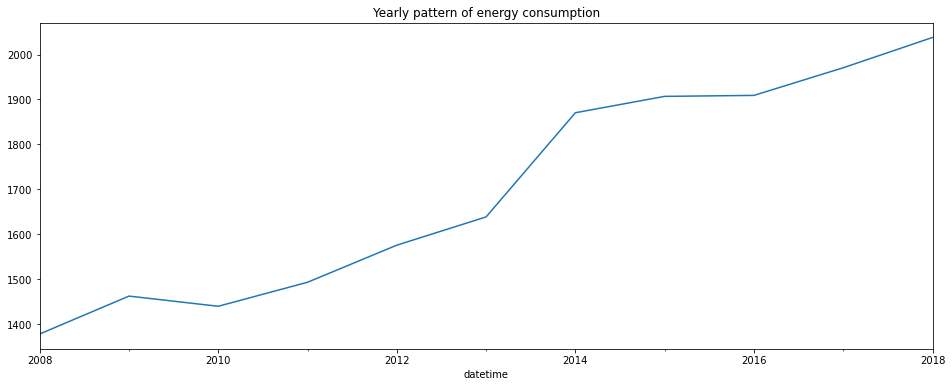

In [11]:
title= 'Yearly pattern of energy consumption'
train_df['energy'].resample('Y').mean().plot(figsize=(16,6), title=title);

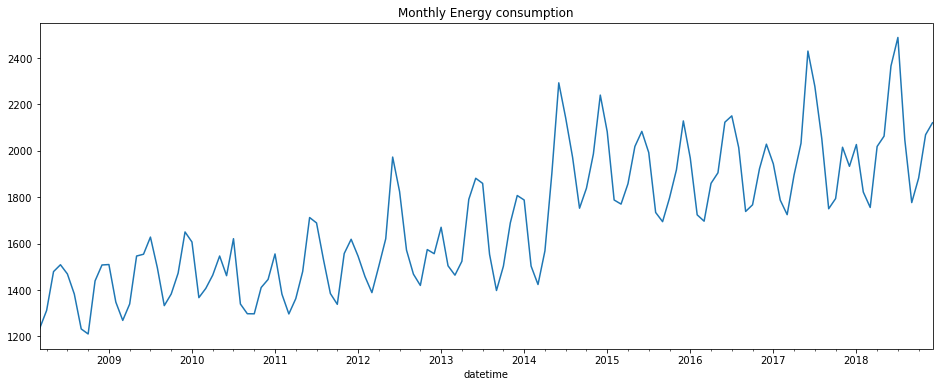

In [12]:
title= 'Monthly Energy consumption'
train_df['energy'].resample('M').mean().plot(figsize=(16,6), title=title);

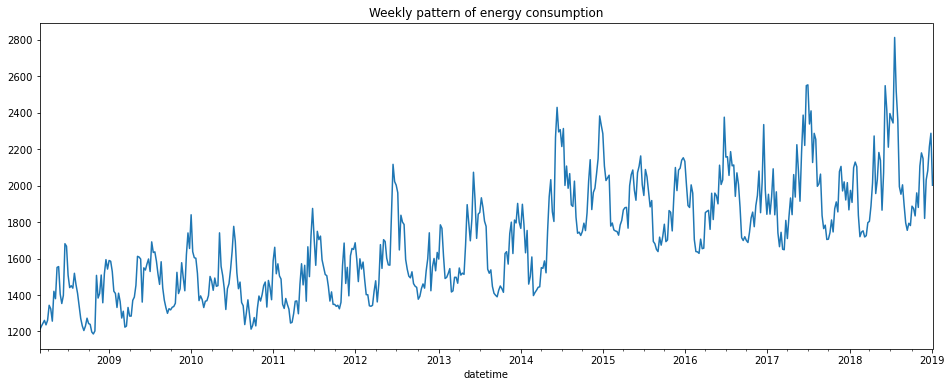

In [13]:
title= 'Weekly pattern of energy consumption'
train_df['energy'].resample('W').mean().plot(figsize=(16,6), title=title);

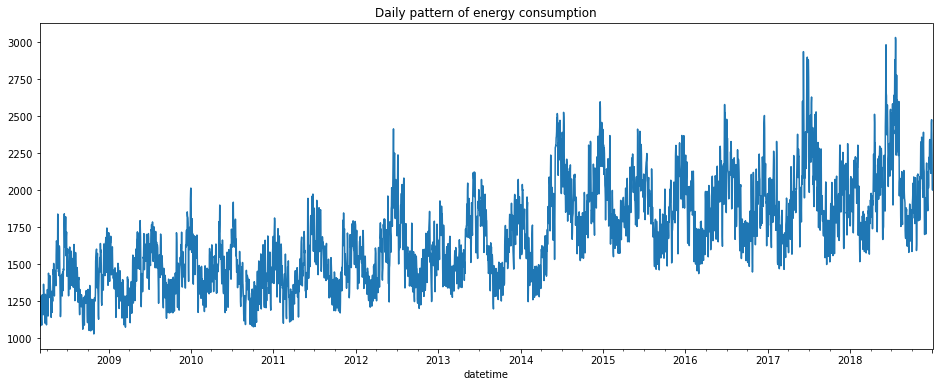

In [14]:
title= 'Daily pattern of energy consumption'
train_df['energy'].resample('D').mean().plot(figsize=(16,6), title=title);

`Observation:`
#### Can observe clear seasonality in the energy consumption, it is more pronounced at monthly , weekly , daily levels

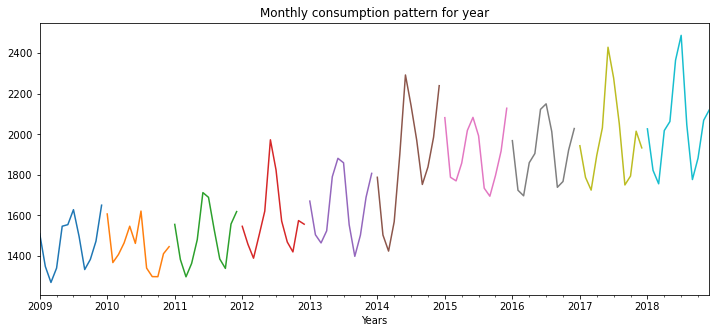

In [15]:
for year in range(2009,2019,1):
    title= f'Monthly consumption pattern for year'
    train_df['energy'].loc[str(year)].resample('M').mean().plot(figsize=(12,5), title=title)
    plt.xlabel('Years')


In [16]:
def consumption_patttern(df):
    years = [i for i in range(df.index.year.min(),df.index.year.max()+1,1)]
    # labels = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    _, axes = plt.subplots(round(len(years)/3), 3, figsize=(20,20))
    print(axes.shape)
    for c,year in enumerate(years):
        i, j = divmod(c, 3)
        df1= df['energy'].loc[str(year)].resample('M').mean()
        labels =  df1.index.strftime('%B')
        sns.lineplot(x=df1.index, y= df1 , data= df1, ax=axes[i,j])
        axes[i,j].set_title(f'Energy consumption pattern for year {year}')
        axes[i,j].set_xlabel('Month')
        axes[i,j].set_xticklabels(labels=labels,rotation=30)
        # axes[i,j].xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
        # axes[i,j].xaxis. .x_ticks(rotation=90)
        plt.tight_layout(pad=2.0)
        c+=1

In [17]:
def month_from_index(df):
    df['month'] =  df.index.strftime('%B')
    return df

In [18]:
(train_df
['2013']['energy']
.resample('M')
.mean()
.to_frame('energy')
.pipe(month_from_index)
# .boxplot(by='month',figsize=(12,5))
)
# plt.xticks(rotation=40);

,energy,month
datetime,,
2013-01-31,1670.484677,January
2013-02-28,1504.430678,February
2013-03-31,1464.075579,March
2013-04-30,1523.755591,April
2013-05-31,1790.807718,May
2013-06-30,1881.672419,June
2013-07-31,1859.608013,July
2013-08-31,1553.824592,August
2013-09-30,1397.959067,September


(4, 3)


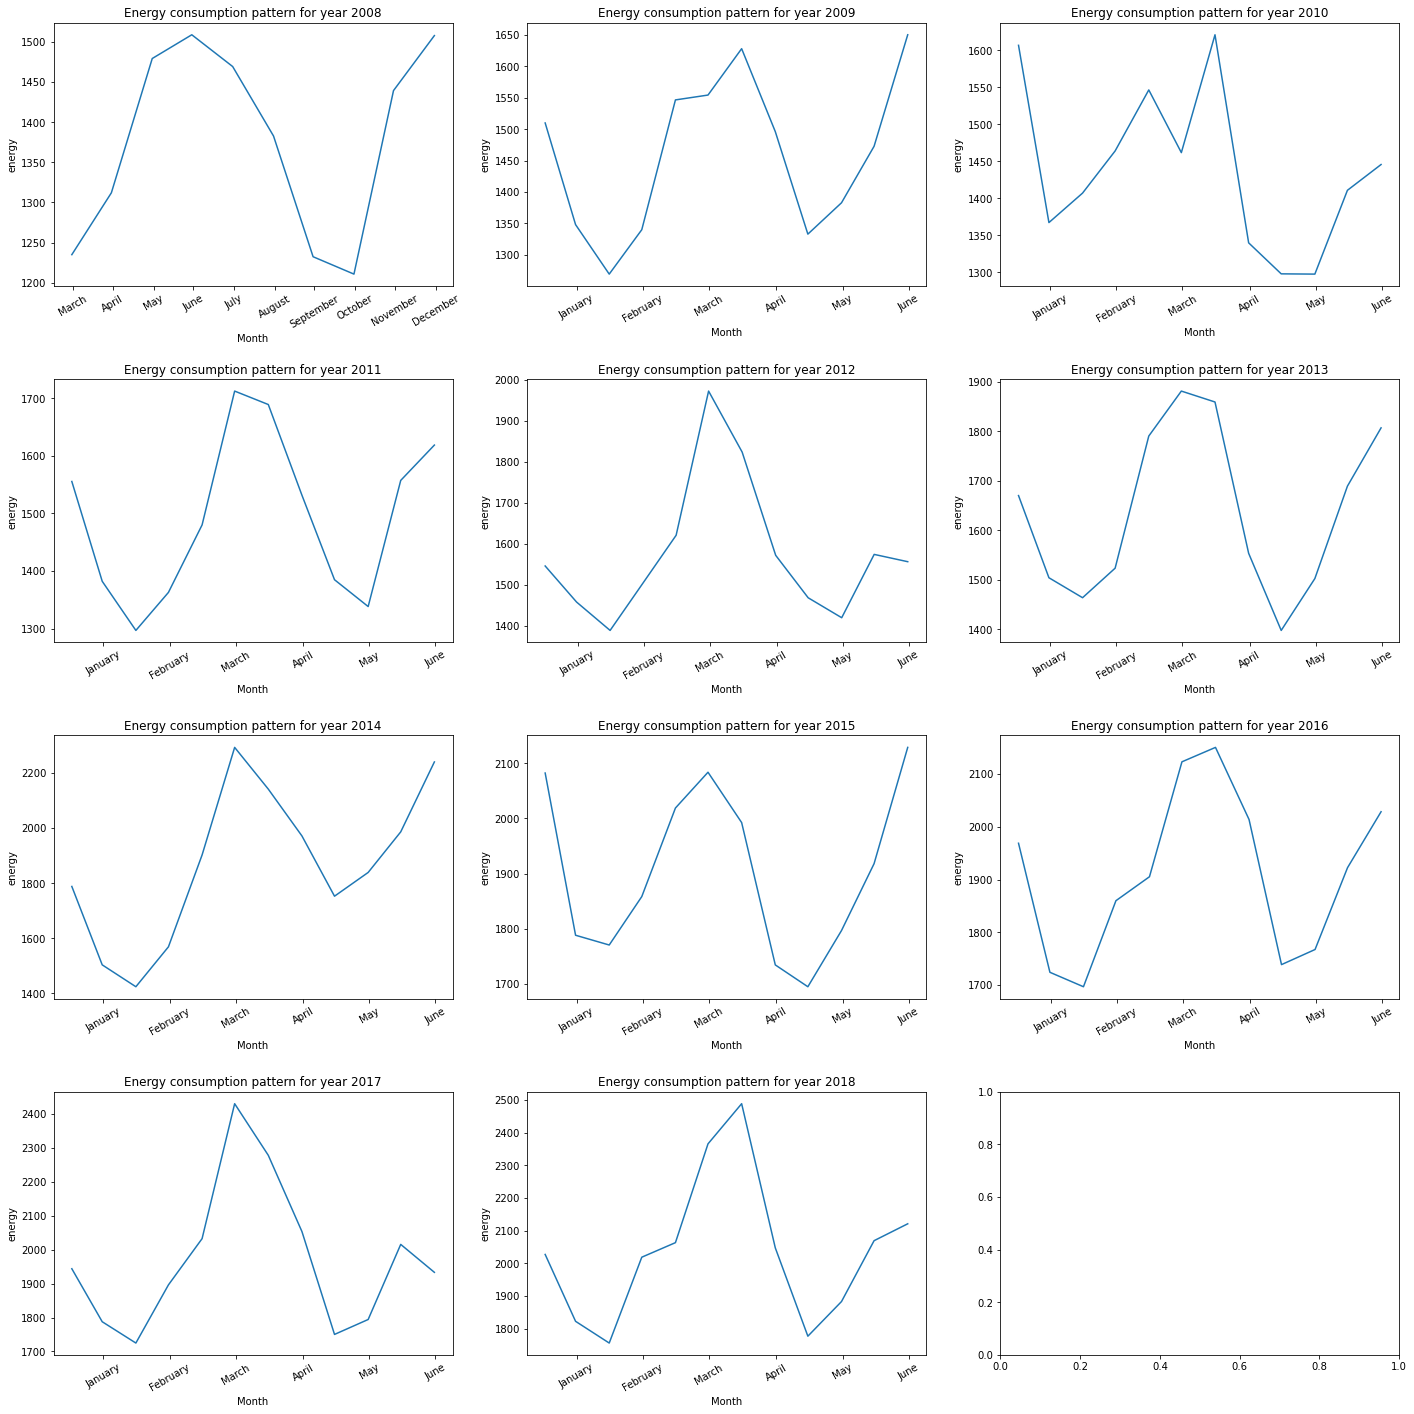

In [19]:
consumption_patttern(train_df)

In [20]:
def create_weekend(df):
    df['is_weekend'] = (df.index.dayofweek > 4).astype('int')
    # df['is_weekend'] = (df['is_weekend'].dt.dayofweek > 4).map({True: 1, False: 0})
    return df
   

In [21]:
train_df = create_weekend(train_df)
test_df = create_weekend(test_df)

In [22]:
display(train_df['is_weekend'].value_counts())
display(test_df['is_weekend'].value_counts())

0    67824
1    27168
Name: is_weekend, dtype: int64

0    18816
1     7488
Name: is_weekend, dtype: int64

In [23]:
display(train_df.describe()),display(train_df.info())

,row_id,energy,is_weekend
count,94992.000000,93092.000000,94992.000000
mean,47496.500000,1702.995014,0.286003
std,27421.972723,369.322103,0.451893
min,1.000000,866.388600,0.000000
25%,23748.750000,1431.541100,0.000000
50%,47496.500000,1654.465800,0.000000
75%,71244.250000,1935.993450,1.000000
max,94992.000000,3374.399600,1.000000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94992 entries, 2008-03-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      94992 non-null  int64  
 1   energy      93092 non-null  float64
 2   is_weekend  94992 non-null  int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.5 MB


None

(None, None)

## 3. Null handling strategy

In [24]:
train_df.isna().sum()/len(train_df)

row_id        0.000000
energy        0.020002
is_weekend    0.000000
dtype: float64

In [25]:
# train_df.query('~energy.isna()',engine='python').isna().count(), train_df.count(), train_df[~train_df.energy.isna()].count()

In [26]:
def null_handler(df , strat = 'drop'):
    """"
    Strategy to use for handling null values in times series
    """
    if strat == 'drop':
        # dumb start/ not worth to even mention/ don't use, doesn't make sense
        # especially in timesries
        df = df[~df.energy.isna()]
    elif strat == 'ffill':
        df['energy'] = df['energy'].ffill()
    elif strat == 'bfill':
        df['energy'] = df['energy'].bfill() 
    elif strat == 'sma':
        # average interval for spike in energy consumption -- can do domain specific search and learn the number in hours
        df['energy'] = df['energy'].rolling(window=5).mean()
    elif strat == 'wma':
        df['energy'] = df['energy'].rolling(window=5).apply(lambda x: x[::-1].cumsum().sum() * 2 / n / (n + 1))
    elif strat == 'ewma':
        df['energy'] = df['energy'].ewm(halflife=4).mean()
    elif strat == 'interpolate_spline':
        df['energy'] = df['energy'].interpolate(option='spline')
    elif strat == 'interpolate_linear':
        df['energy'] = df['energy'].interpolate(option='linear')
    elif strat == 'interpolate_time':
        df['energy'] = df['energy'].interpolate(option='time')
    return df

In [27]:
# NULL handle strategy applied
train_df = null_handler(train_df,'interpolate_spline')

#### Setting freq = 'H' for train dataset

In [28]:
df_train = train_df.asfreq('H')
df_test  = test_df.asfreq('H')

### observing trend and seasonality

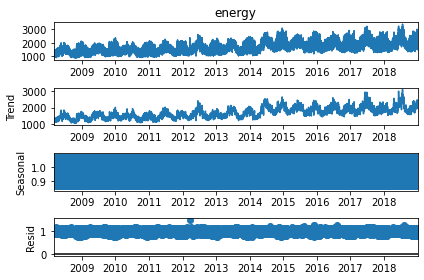

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_train['energy'], model='mul')  # model='mul' also works
result.plot();

## 4.Train-Test splits

In [30]:
# import numpy as np
# from sklearn.model_selection import TimeSeriesSplit
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
# y = np.array([1, 2, 3, 4, 5, 6])
#  tscv = TimeSeriesSplit()
# print(tscv)
# TimeSeriesSplit(max_train_size=None, n_splits=3)
# for train_index, test_index in tscv.split(X):
# print(“TRAIN:”, train_index, “TEST:”, test_index) X_train, X_test = X[train_index], X[test_index]
# y_train, y_test = y[train_index], y[test_index]

# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# import statsmodels.api as sm
# tscv = TimeSeriesSplit(n_splits = 4)
# rmse = []
# for train_index, test_index in tscv.split(cross_validation):
#     cv_train, cv_test = cross_validation.iloc[train_index], cross_validation.iloc[test_index]
    
#     arma = sm.tsa.ARMA(cv_train, (2,2)).fit(disp=False)
    
#     predictions = arma.predict(cv_test.index.values[0], cv_test.index.values[-1])
#     true_values = cv_test.values
#     rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
# print("RMSE: {}".format(np.mean(rmse)))

In [31]:
# df_train.index.year.unique()
len(df_train['2018']), len(df_train[:'2017']) + len(df_train['2018']), len(df_train)

(8760, 94992, 94992)

In [32]:
train_data = df_train[:'2017']  
test_data = df_train['2018']

## 5.Fitting the Model

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['energy'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

c:\Users\Troopers\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [34]:
test_predictions = fitted_model.forecast( len(test_data)).rename('HW Forecast')

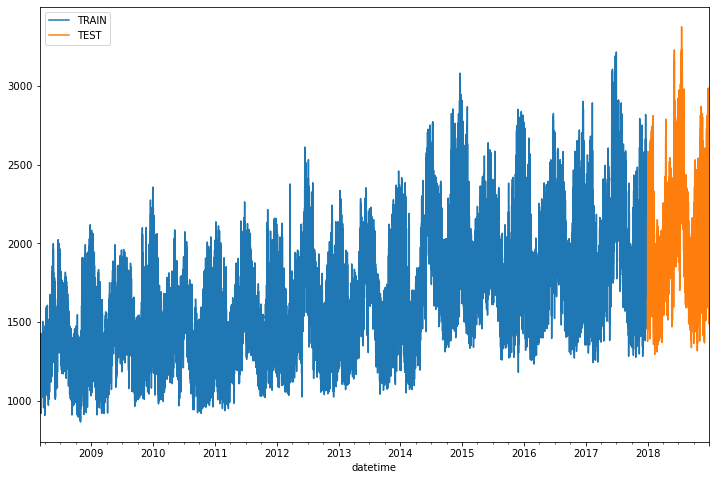

In [35]:
train_data['energy'].plot(legend=True,label='TRAIN')
test_data['energy'].plot(legend=True,label='TEST',figsize=(12,8));

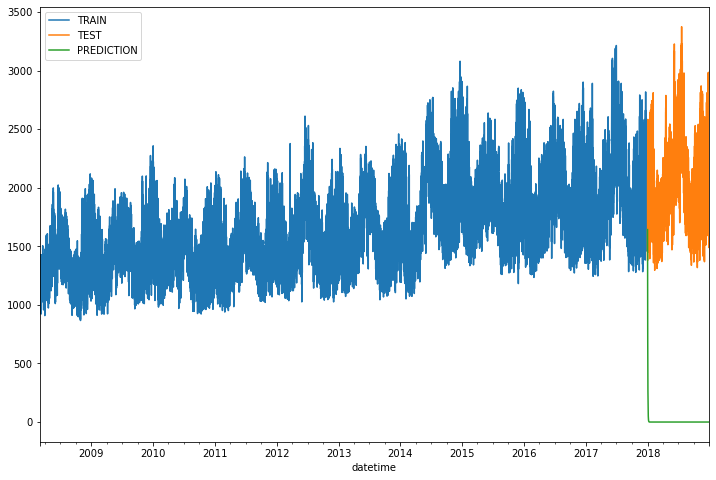

In [36]:
train_data['energy'].plot(legend=True,label='TRAIN')
test_data['energy'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [37]:
len(test_data),len(test_predictions)

(8760, 8760)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mean_absolute_error(test_data['energy'],test_predictions)

2032.062150622759

In [39]:
np.sqrt(mean_squared_error(test_data['energy'],test_predictions))

2063.904823569859

In [40]:
test_data.describe()['energy']

count    8760.000000
mean     2037.666158
std       351.648890
min      1295.207200
25%      1783.293600
50%      1988.925400
75%      2273.817700
max      3374.399600
Name: energy, dtype: float64

In [41]:
train_data.describe()['energy']

count    86232.000000
mean      1669.182443
std        353.647983
min        866.388600
25%       1409.699200
50%       1620.710300
75%       1895.505525
max       3213.803600
Name: energy, dtype: float64

## Forecasting into Future

In [42]:
final_model = ExponentialSmoothing(df_train['energy'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

c:\Users\Troopers\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [43]:
test_df

,row_id,is_weekend
datetime,,
2019-01-01 00:00:00,94993,0
2019-01-01 01:00:00,94994,0
2019-01-01 02:00:00,94995,0
2019-01-01 03:00:00,94996,0
2019-01-01 04:00:00,94997,0
...,...,...
2021-12-31 19:00:00,121292,0
2021-12-31 20:00:00,121293,0
2021-12-31 21:00:00,121294,0


In [44]:
forecast_predictions = final_model.forecast(len(test_df))

In [45]:
forecast_predictions

2019-01-01 00:00:00    1985.504614
2019-01-01 01:00:00    1824.458932
2019-01-01 02:00:00    1698.280534
2019-01-01 03:00:00    1591.324004
2019-01-01 04:00:00    1501.032184
                          ...     
2021-12-31 19:00:00       0.000000
2021-12-31 20:00:00       0.000000
2021-12-31 21:00:00       0.000000
2021-12-31 22:00:00       0.000000
2021-12-31 23:00:00       0.000000
Freq: H, Length: 26304, dtype: float64

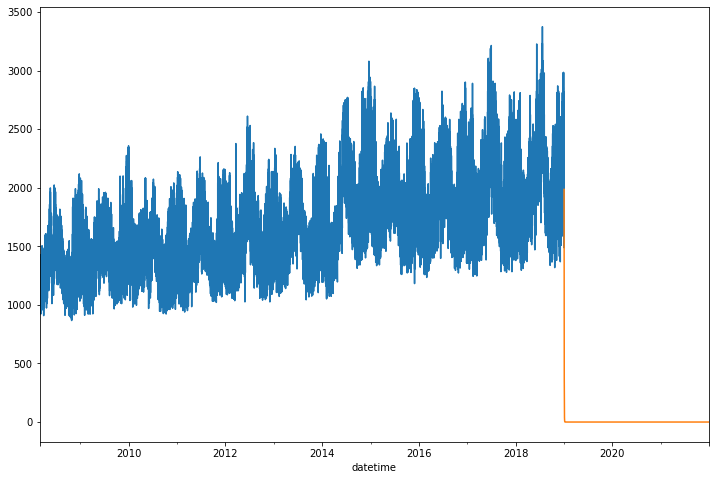

In [46]:
train_df['energy'].plot(figsize=(12,8))
forecast_predictions.plot();

In [47]:
test_df

,row_id,is_weekend
datetime,,
2019-01-01 00:00:00,94993,0
2019-01-01 01:00:00,94994,0
2019-01-01 02:00:00,94995,0
2019-01-01 03:00:00,94996,0
2019-01-01 04:00:00,94997,0
...,...,...
2021-12-31 19:00:00,121292,0
2021-12-31 20:00:00,121293,0
2021-12-31 21:00:00,121294,0


In [48]:
sub1 = pd.concat([forecast_predictions.to_frame('energy'), test_df['row_id']],axis=1)[['row_id','energy']].reset_index(drop=True)

In [49]:
sub1.to_csv('model_submission3_spline.csv',index=False)

In [50]:
sub_df

,row_id,energy
0,94993,1702.995014
1,94994,1702.995014
2,94995,1702.995014
3,94996,1702.995014
4,94997,1702.995014
...,...,...
26299,121292,1702.995014
26300,121293,1702.995014
26301,121294,1702.995014
26302,121295,1702.995014
